In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Mexico_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,a few days or more,0%,f,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,within an hour,100%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,within an hour,71%,t,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,within a few hours,100%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,within an hour,100%,t,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11


In [3]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,0%,f,t,Entire villa,Entire home/apt,f,2.0,1.0,1093.1,5.00
1,100%,t,t,Entire home,Entire home/apt,f,2.9,1.0,1511.6,4.70
2,71%,t,t,Entire rental unit,Entire home/apt,f,4.0,1.0,2029.0,4.75
3,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,1140.0,4.96
4,100%,t,t,Entire loft,Entire home/apt,f,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...
26577,100%,t,t,Private room in guesthouse,Private room,t,4.0,1.0,488.0,5.00
26578,100%,f,t,Room in hotel,Private room,t,2.0,1.0,1093.1,5.00
26579,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2700.0,5.00
26580,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2600.0,5.00


In [4]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\MaFer\AppData\Local\Temp\ipykernel_23980\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_23980\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_23980\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [5]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]
#f3 = Private room
f3= f1[(f1["room_type"] == 2)]
#f4 = Shared room
f4= f1[(f1["room_type"] == 3)]
#f5 = Hotel room
f5= f1[(f1["room_type"] == 4)]

<Axes: xlabel='room_type', ylabel='price'>

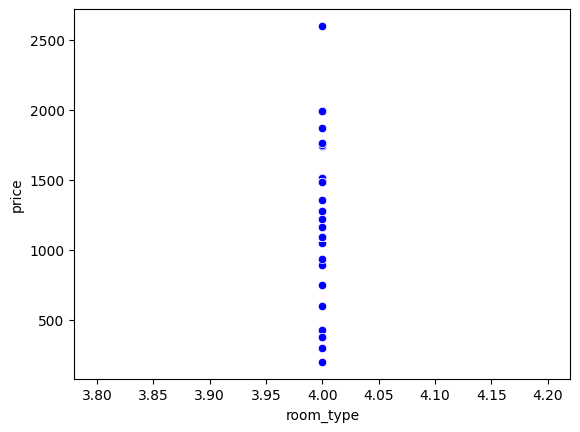

In [6]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='room_type',y='price', color="blue", data=f5)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_response_rate', ylabel='price'>

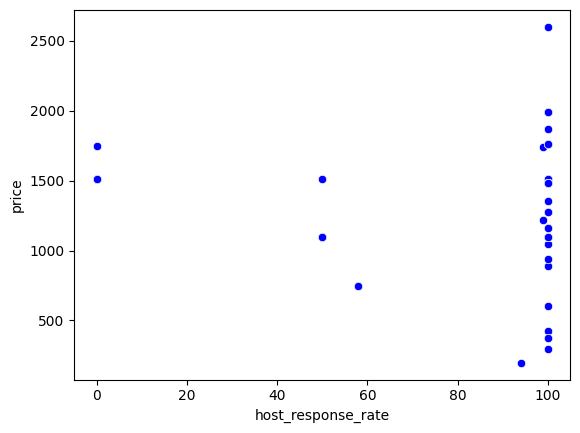

In [7]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_response_rate',y='price', color="blue", data=f5)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

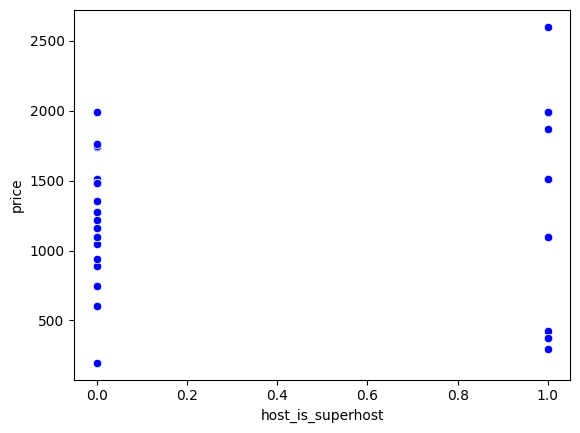

In [8]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_is_superhost',y='price', color="blue", data=f5)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

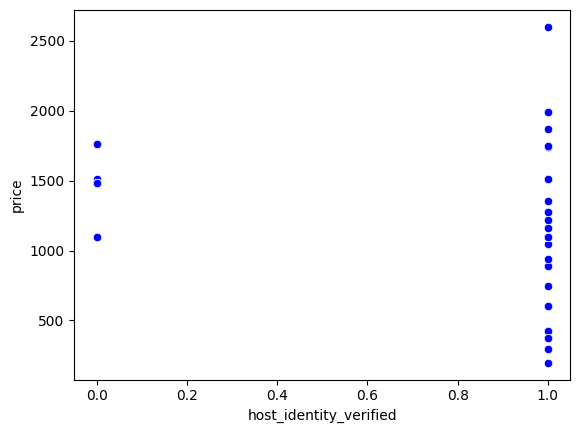

In [9]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_identity_verified',y='price', color="blue", data=f5)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

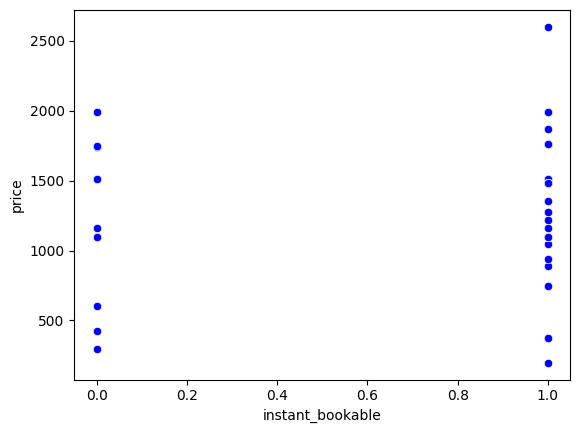

In [10]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='instant_bookable',y='price', color="blue", data=f5)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

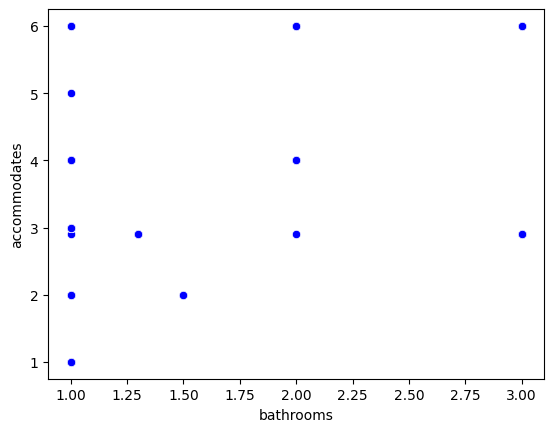

In [11]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='bathrooms',y='accommodates', color="blue", data=f5)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

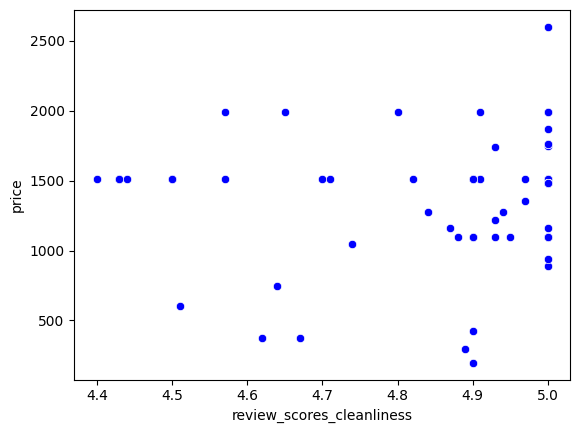

In [12]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='review_scores_cleanliness',y='price', color="blue", data=f5)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)


In [13]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= f5 [['room_type']]
Vars_Dep= f5 ['price']

In [14]:
Vars_Indep2= f5 [['host_response_rate']]
Vars_Dep2= f5 ['price']

In [15]:
Vars_Indep3= f5 [['host_is_superhost']]
Vars_Dep3= f5 ['price']

In [16]:
Vars_Indep4= f5 [['host_identity_verified']]
Vars_Dep4= f5 ['price']

In [17]:
Vars_Indep5= f5 [['instant_bookable']]
Vars_Dep5= f5 ['price']

In [18]:
Vars_Indep6= f5 [['bathrooms']]
Vars_Dep6= f5 ['accommodates']

In [19]:
Vars_Indep7= f5 [['review_scores_cleanliness']]
Vars_Dep7= f5 ['price']

In [20]:
Vars_Indep8= f5 [['property_type']]
Vars_Dep8= f5 ['price']

In [21]:
#Se definie model (para room_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
#Se definie model (para host_response_rate) como función regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [23]:
#Se definie model (para host_is_superhost) como función regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [24]:
#Se definie model (para host_identity_verified) como función regresión lineal
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [25]:
#Se definie model (para instant_bookable) como función regresión lineal
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [26]:
#Se definie model (para bathrooms) como función regresión lineal
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [27]:
#Se definie model (para review_scores_cleanliness) como función regresión lineal
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [28]:
#Se definie model (para property_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

In [29]:
#Verficamos la función relacionada al modela
type(model)

sklearn.linear_model._base.LinearRegression

In [30]:
#Verficamos la función relacionada al modela
type(model2)

sklearn.linear_model._base.LinearRegression

In [31]:
#Verficamos la función relacionada al modela
type(model3)

sklearn.linear_model._base.LinearRegression

In [32]:
#Verficamos la función relacionada al modela
type(model4)

sklearn.linear_model._base.LinearRegression

In [33]:
#Verficamos la función relacionada al modela
type(model5)

sklearn.linear_model._base.LinearRegression

In [34]:
#Verficamos la función relacionada al modela
type(model6)

sklearn.linear_model._base.LinearRegression

In [35]:
#Verficamos la función relacionada al modela
type(model7)

sklearn.linear_model._base.LinearRegression

In [36]:
#Verficamos la función relacionada al modela
type(model8)

sklearn.linear_model._base.LinearRegression

In [37]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [38]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [39]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [40]:
#Ajustamos el modelo con las variables antes declaradas
model4.fit(X=Vars_Indep4, y=Vars_Dep4)

LinearRegression()

In [41]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [42]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [43]:
#Ajustamos el modelo con las variables antes declaradas
model7.fit(X=Vars_Indep7, y=Vars_Dep7)

LinearRegression()

In [44]:
#Ajustamos el modelo con las variables antes declaradas
model8.fit(X=Vars_Indep8, y=Vars_Dep8)

LinearRegression()

In [45]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(1291.1712000000002)}

In [46]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1.25944689]),
 'rank_': 1,
 'singular_': array([282.17370537]),
 'intercept_': np.float64(1406.0327560523476)}

In [47]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([230.30584677]),
 'rank_': 1,
 'singular_': array([4.87934422]),
 'intercept_': np.float64(1232.2129032258067)}

In [48]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([111.74073529]),
 'rank_': 1,
 'singular_': array([5.21536192]),
 'intercept_': np.float64(1215.1875000000002)}

In [49]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-162.07706735]),
 'rank_': 1,
 'singular_': array([4.33220498]),
 'intercept_': np.float64(1423.4260869565219)}

In [50]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.22337689]),
 'rank_': 1,
 'singular_': array([6.54702375]),
 'intercept_': np.float64(1.3720183503361356)}

In [51]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-72.04598667]),
 'rank_': 1,
 'singular_': array([1.66464074]),
 'intercept_': np.float64(1646.1677129014315)}

In [52]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([23.77597967]),
 'rank_': 1,
 'singular_': array([20.8038458]),
 'intercept_': np.float64(-302.7704768946394)}

Modelo matemático: y= 0.0 + 125.132 <- Este caso especiífico es de room_type

In [53]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred= model.predict(X=f5[['room_type']])
y_pred

array([1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712, 1291.1712,
       1291.1712, 1291.1712, 1291.1712, 1291.1712, 

In [54]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred2= model2.predict(X=f5[['host_response_rate']])
y_pred2

array([1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1281.34751428, 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1332.98483663,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1406.03275605,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1281.34751428,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1406.03275605, 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1406.03275605, 1280.0880674 , 1280.0880674 , 1280.0880674 ,
       1280.0880674 , 1280.0880674 , 1280.0880674 , 1280.08806

In [55]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred3= model3.predict(X=f5[['host_is_superhost']])
y_pred3

array([1462.51875   , 1462.51875   , 1462.51875   , 1462.51875   ,
       1232.21290323, 1232.21290323, 1232.21290323, 1232.21290323,
       1232.21290323, 1232.21290323, 1232.21290323, 1462.51875   ,
       1232.21290323, 1232.21290323, 1462.51875   , 1232.21290323,
       1232.21290323, 1232.21290323, 1232.21290323, 1232.21290323,
       1232.21290323, 1462.51875   , 1462.51875   , 1462.51875   ,
       1462.51875   , 1462.51875   , 1232.21290323, 1232.21290323,
       1462.51875   , 1462.51875   , 1462.51875   , 1462.51875   ,
       1462.51875   , 1462.51875   , 1462.51875   , 1462.51875   ,
       1462.51875   , 1462.51875   , 1462.51875   , 1462.51875   ,
       1462.51875   , 1232.21290323, 1462.51875   , 1462.51875   ,
       1232.21290323, 1462.51875   , 1232.21290323, 1232.21290323,
       1232.21290323, 1462.51875   , 1232.21290323, 1232.21290323,
       1232.21290323, 1232.21290323, 1462.51875   , 1232.21290323,
       1232.21290323, 1232.21290323, 1232.21290323, 1232.21290

In [56]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred4= model4.predict(X=f5[['host_identity_verified']])
y_pred4

array([1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823529,
       1215.1875    , 1326.92823529, 1326.92823529, 1326.92823529,
       1326.92823529, 1326.92823529, 1326.92823529, 1326.92823

In [57]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred5= model5.predict(X=f5[['instant_bookable']])
y_pred5

array([1261.34901961, 1423.42608696, 1423.42608696, 1261.34901961,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901961,
       1423.42608696, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1423.42608696, 1423.42608696, 1261.34901961,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1423.42608696, 1423.42608696, 1261.34901961,
       1423.42608696, 1423.42608696, 1261.34901961, 1423.42608696,
       1423.42608696, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901961,
       1261.34901961, 1423.42608696, 1261.34901961, 1423.42608696,
       1261.34901961, 1423.42608696, 1261.34901961, 1261.34901961,
       1423.42608696, 1423.42608696, 1261.34901961, 1423.42608696,
       1423.42608696, 1261.34901961, 1261.34901961, 1423.42608696,
       1261.34901961, 1261.34901961, 1261.34901961, 1261.34901

In [58]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred6= model6.predict(X=f5[['bathrooms']])
y_pred6

array([2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.96240831,
       2.59539525, 3.81877214, 2.96240831, 2.96240831, 2.59539525,
       2.59539525, 2.59539525, 2.96240831, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 3.20708369,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 3.20708369,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539525,
       2.59539525, 2.59539525, 2.59539525, 2.59539525, 2.59539

In [59]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred7= model7.predict(X=f5[['review_scores_cleanliness']])
y_pred7

array([1285.93777953, 1285.93777953, 1288.09915913, 1285.93777953,
       1297.4651374 , 1290.26053873, 1295.3037578 , 1288.09915913,
       1285.93777953, 1293.1423782 , 1290.9809986 , 1294.58329793,
       1285.93777953, 1285.93777953, 1293.1423782 , 1311.87433473,
       1306.83111566, 1285.93777953, 1292.42191833, 1285.93777953,
       1300.34697686, 1292.42191833, 1285.93777953, 1316.9175538 ,
       1311.15387486, 1298.90605713, 1293.1423782 , 1290.9809986 ,
       1293.86283806, 1321.96077287, 1321.96077287, 1285.93777953,
       1285.93777953, 1285.93777953, 1327.00399193, 1326.28353207,
       1316.9175538 , 1327.00399193, 1293.1423782 , 1293.1423782 ,
       1307.55157553, 1321.240313  , 1285.93777953, 1285.93777953,
       1285.93777953, 1285.93777953, 1285.93777953, 1285.93777953,
       1285.93777953, 1285.93777953, 1304.66973606, 1285.93777953,
       1285.93777953, 1285.93777953, 1285.93777953, 1285.93777953,
       1285.93777953, 1289.54007886, 1290.9809986 , 1285.93777

In [60]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred8= model8.predict(X=f5[['property_type']])
y_pred8

array([1337.77212015, 1242.66820148, 1242.66820148, 1337.77212015,
       1337.77212015, 1337.77212015, 1337.77212015, 1337.77212015,
       1337.77212015, 1218.89222181, 1337.77212015, 1337.77212015,
       1218.89222181, 1337.77212015, 1337.77212015, 1195.11624214,
       1242.66820148, 1337.77212015, 1337.77212015, 1337.77212015,
       1195.11624214, 1337.77212015, 1337.77212015, 1337.77212015,
       1337.77212015, 1337.77212015, 1242.66820148, 1337.77212015,
       1337.77212015, 1313.99614048, 1313.99614048, 1313.99614048,
       1313.99614048, 1313.99614048, 1313.99614048, 1313.99614048,
       1313.99614048, 1313.99614048, 1313.99614048, 1313.99614048,
       1313.99614048, 1218.89222181, 1242.66820148, 1337.77212015,
       1242.66820148, 1337.77212015, 1337.77212015, 1337.77212015,
       1337.77212015, 1242.66820148, 1218.89222181, 1242.66820148,
       1266.44418115, 1218.89222181, 1337.77212015, 1337.77212015,
       1218.89222181, 1218.89222181, 1218.89222181, 1218.89222

In [61]:
# Crear una copia de f5 antes de modificarlo
f5_copy = f5.copy()

In [62]:
#Insertamos la columna de predicciones en el Dataframe
f5.insert(0, 'Pred_room', y_pred)
f5

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
48,1291.1712,100.0,1,1,69,4,1,3.0,1.0,1511.6,5.00
62,1291.1712,100.0,1,1,65,4,0,2.0,1.0,1511.6,5.00
75,1291.1712,100.0,1,1,65,4,0,2.0,1.0,1511.6,4.97
100,1291.1712,100.0,1,1,69,4,1,3.0,1.0,1872.0,5.00
135,1291.1712,100.0,0,1,69,4,1,2.0,1.0,1275.0,4.84
...,...,...,...,...,...,...,...,...,...,...,...
24907,1291.1712,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24908,1291.1712,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24909,1291.1712,100.0,0,0,68,4,1,2.9,1.3,1093.1,5.00
24910,1291.1712,100.0,0,0,68,4,1,2.0,1.0,1484.0,5.00


In [63]:
# Insertamos las columnas de predicciones en la copia
f5_copy.insert(0, 'Pred_response', y_pred2)
f5_copy.insert(0, 'Pred_superhost', y_pred3)
f5_copy.insert(0, 'Pred_identity', y_pred4)
f5_copy.insert(0, 'Pred_bookable', y_pred5)
f5_copy.insert(0, 'Pred_bathrooms', y_pred6)
f5_copy.insert(0, 'Pred_cleanliness', y_pred7)
f5_copy.insert(0, 'Pred_property', y_pred8)

<Axes: xlabel='room_type', ylabel='price'>

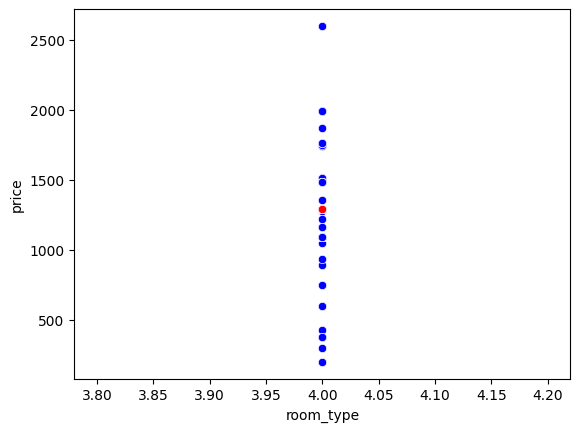

In [64]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='room_type', y='price', color="blue", data = f5)
sns.scatterplot(x='room_type', y='Pred_room', color="red", data = f5)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_response_rate', ylabel='price'>

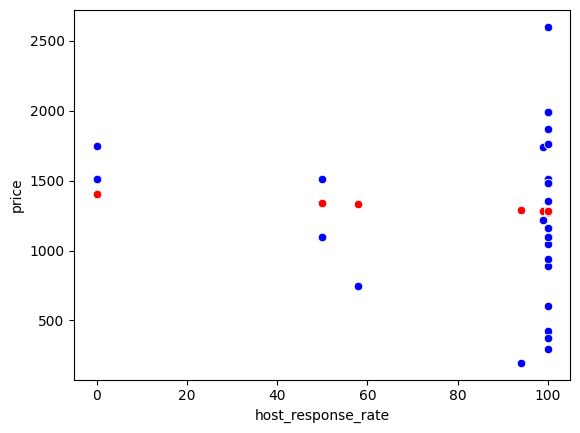

In [65]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_response_rate', y='price', color="blue", data = f5_copy)
sns.scatterplot(x='host_response_rate', y='Pred_response', color="red", data = f5_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

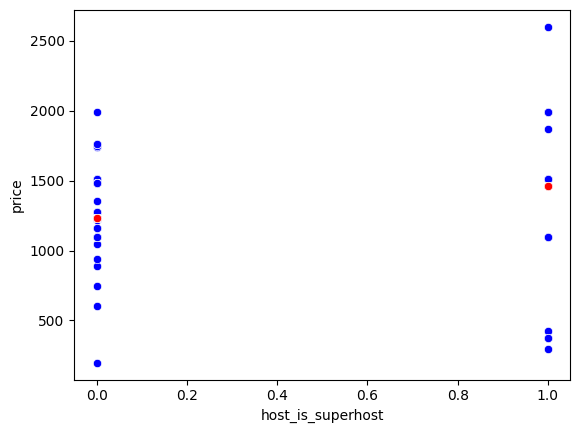

In [66]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data = f5_copy)
sns.scatterplot(x='host_is_superhost', y='Pred_superhost', color="red", data = f5_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

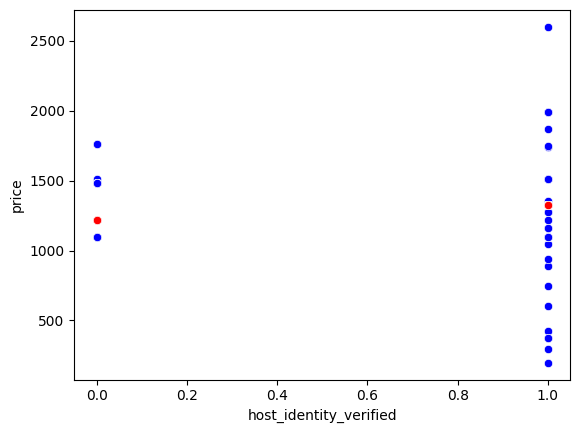

In [67]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data = f5_copy)
sns.scatterplot(x='host_identity_verified', y='Pred_identity', color="red", data = f5_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='instant_bookable', ylabel='price'>

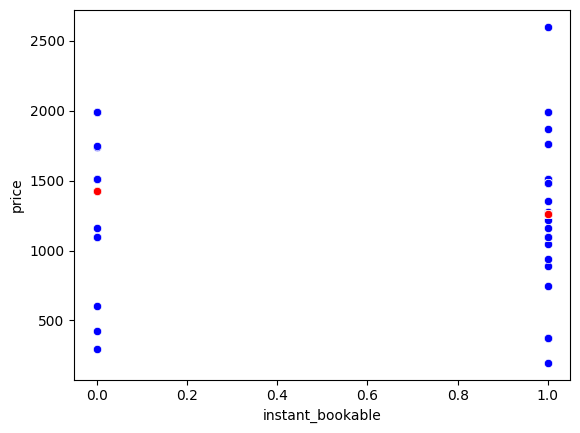

In [68]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='instant_bookable', y='price', color="blue", data = f5_copy)
sns.scatterplot(x='instant_bookable', y='Pred_bookable', color="red", data = f5_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

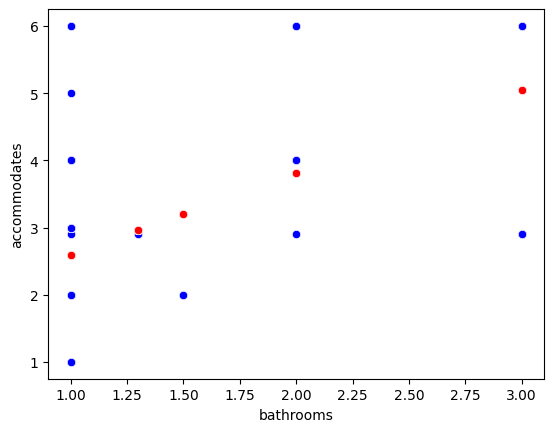

In [69]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data = f5_copy)
sns.scatterplot(x='bathrooms', y='Pred_bathrooms', color="red", data = f5_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

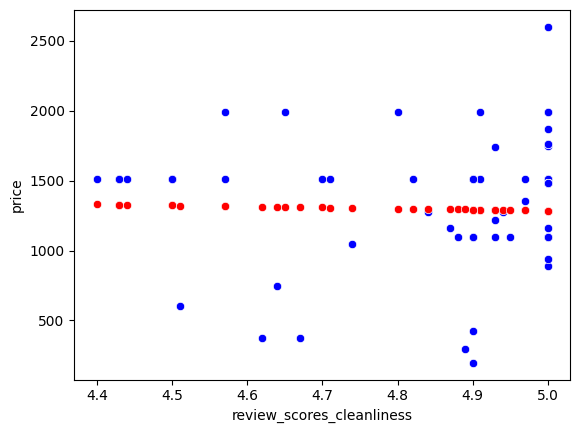

In [70]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data = f5_copy)
sns.scatterplot(x='review_scores_cleanliness', y='Pred_cleanliness', color="red", data = f5_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='property_type', ylabel='price'>

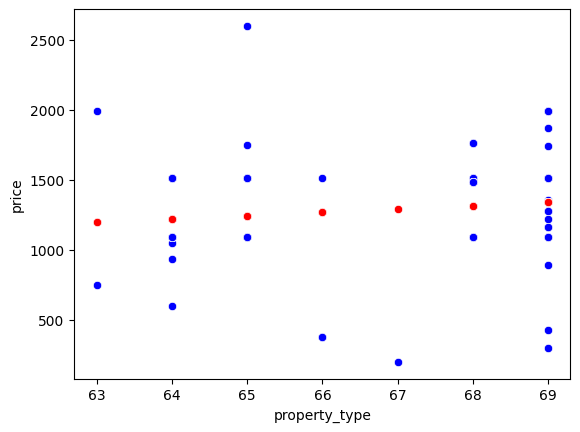

In [71]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='property_type', y='price', color="blue", data = f5_copy)
sns.scatterplot(x='property_type', y='Pred_property', color="red", data = f5_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

In [72]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0

In [73]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.00801614253904226

In [74]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

0.08015035963725525

In [75]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Vars_Indep4, y=Vars_Dep4)
coef_Deter4

0.02155582197416772

In [76]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.03129203223743138

In [77]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.29712134572686355

In [78]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Vars_Indep7, y=Vars_Dep7)
coef_Deter7

0.0009129211335544563

In [79]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Vars_Indep8, y=Vars_Dep8)
coef_Deter8

0.015528758212420501

In [80]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [81]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.08953291316070454)

In [82]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.28310838849680037)

In [83]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.14681901094261507)

In [84]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.17689554046790262)

In [85]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.545088383408474)

In [86]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.030214584782095818)

In [87]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.12461443821813145)

In [88]:
#Graficamos todas las despersiones entre todas las variables
#sns.pairplot(f2)

In [89]:
#Analizar categorias de una columna
df6 = f5.groupby(['room_type'])['room_type'].count()
df6

room_type
4    125
Name: room_type, dtype: int64

In [90]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=f5.corr()
Corr_Factors

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.131898,-0.171238,0.171712,NaN,0.326071,-0.006763,0.085028,-0.089533,-0.136346
host_is_superhost,NaN,0.131898,1.000000,0.402396,0.243525,NaN,-0.241836,-0.062976,-0.246347,0.283108,-0.421740
host_identity_verified,NaN,-0.171238,0.402396,1.000000,-0.335485,NaN,-0.281490,-0.350445,-0.538525,0.146819,-0.334681
property_type,NaN,0.171712,0.243525,-0.335485,1.000000,NaN,-0.100747,0.239563,0.153711,0.124614,0.044850
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.326071,-0.241836,-0.281490,-0.100747,NaN,1.000000,0.222015,0.209230,-0.176896,-0.034766
accommodates,NaN,-0.006763,-0.062976,-0.350445,0.239563,NaN,0.222015,1.000000,0.545088,0.036598,0.024885
bathrooms,NaN,0.085028,-0.246347,-0.538525,0.153711,NaN,0.209230,0.545088,1.000000,-0.278962,0.230182
price,NaN,-0.089533,0.283108,0.146819,0.124614,NaN,-0.176896,0.036598,-0.278962,1.000000,-0.030215


In [91]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors_pred=f5_copy.corr()
Corr_Factors_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,-0.044850,0.153711,0.100747,-0.335485,0.243525,-0.171712,0.171712,0.243525,-0.335485,1.000000,NaN,-0.100747,0.239563,0.153711,0.124614,0.044850
Pred_cleanliness,-0.044850,1.000000,-0.230182,-0.034766,0.334681,0.421740,-0.136346,0.136346,0.421740,0.334681,-0.044850,NaN,0.034766,-0.024885,-0.230182,0.030215,-1.000000
Pred_bathrooms,0.153711,-0.230182,1.000000,-0.209230,-0.538525,-0.246347,-0.085028,0.085028,-0.246347,-0.538525,0.153711,NaN,0.209230,0.545088,1.000000,-0.278962,0.230182
Pred_bookable,0.100747,-0.034766,-0.209230,1.000000,0.281490,0.241836,0.326071,-0.326071,0.241836,0.281490,0.100747,NaN,-1.000000,-0.222015,-0.209230,0.176896,0.034766
Pred_identity,-0.335485,0.334681,-0.538525,0.281490,1.000000,0.402396,0.171238,-0.171238,0.402396,1.000000,-0.335485,NaN,-0.281490,-0.350445,-0.538525,0.146819,-0.334681
Pred_superhost,0.243525,0.421740,-0.246347,0.241836,0.402396,1.000000,-0.131898,0.131898,1.000000,0.402396,0.243525,NaN,-0.241836,-0.062976,-0.246347,0.283108,-0.421740
Pred_response,-0.171712,-0.136346,-0.085028,0.326071,0.171238,-0.131898,1.000000,-1.000000,-0.131898,0.171238,-0.171712,NaN,-0.326071,0.006763,-0.085028,0.089533,0.136346
host_response_rate,0.171712,0.136346,0.085028,-0.326071,-0.171238,0.131898,-1.000000,1.000000,0.131898,-0.171238,0.171712,NaN,0.326071,-0.006763,0.085028,-0.089533,-0.136346
host_is_superhost,0.243525,0.421740,-0.246347,0.241836,0.402396,1.000000,-0.131898,0.131898,1.000000,0.402396,0.243525,NaN,-0.241836,-0.062976,-0.246347,0.283108,-0.421740
host_identity_verified,-0.335485,0.334681,-0.538525,0.281490,1.000000,0.402396,0.171238,-0.171238,0.402396,1.000000,-0.335485,NaN,-0.281490,-0.350445,-0.538525,0.146819,-0.334681


In [92]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.131898,0.171238,0.171712,NaN,0.326071,0.006763,0.085028,0.089533,0.136346
host_is_superhost,NaN,0.131898,1.000000,0.402396,0.243525,NaN,0.241836,0.062976,0.246347,0.283108,0.421740
host_identity_verified,NaN,0.171238,0.402396,1.000000,0.335485,NaN,0.281490,0.350445,0.538525,0.146819,0.334681
property_type,NaN,0.171712,0.243525,0.335485,1.000000,NaN,0.100747,0.239563,0.153711,0.124614,0.044850
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.326071,0.241836,0.281490,0.100747,NaN,1.000000,0.222015,0.209230,0.176896,0.034766
accommodates,NaN,0.006763,0.062976,0.350445,0.239563,NaN,0.222015,1.000000,0.545088,0.036598,0.024885
bathrooms,NaN,0.085028,0.246347,0.538525,0.153711,NaN,0.209230,0.545088,1.000000,0.278962,0.230182
price,NaN,0.089533,0.283108,0.146819,0.124614,NaN,0.176896,0.036598,0.278962,1.000000,0.030215


In [93]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1_pred=abs(Corr_Factors_pred)
Corr_Factors1_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,0.044850,0.153711,0.100747,0.335485,0.243525,0.171712,0.171712,0.243525,0.335485,1.000000,NaN,0.100747,0.239563,0.153711,0.124614,0.044850
Pred_cleanliness,0.044850,1.000000,0.230182,0.034766,0.334681,0.421740,0.136346,0.136346,0.421740,0.334681,0.044850,NaN,0.034766,0.024885,0.230182,0.030215,1.000000
Pred_bathrooms,0.153711,0.230182,1.000000,0.209230,0.538525,0.246347,0.085028,0.085028,0.246347,0.538525,0.153711,NaN,0.209230,0.545088,1.000000,0.278962,0.230182
Pred_bookable,0.100747,0.034766,0.209230,1.000000,0.281490,0.241836,0.326071,0.326071,0.241836,0.281490,0.100747,NaN,1.000000,0.222015,0.209230,0.176896,0.034766
Pred_identity,0.335485,0.334681,0.538525,0.281490,1.000000,0.402396,0.171238,0.171238,0.402396,1.000000,0.335485,NaN,0.281490,0.350445,0.538525,0.146819,0.334681
Pred_superhost,0.243525,0.421740,0.246347,0.241836,0.402396,1.000000,0.131898,0.131898,1.000000,0.402396,0.243525,NaN,0.241836,0.062976,0.246347,0.283108,0.421740
Pred_response,0.171712,0.136346,0.085028,0.326071,0.171238,0.131898,1.000000,1.000000,0.131898,0.171238,0.171712,NaN,0.326071,0.006763,0.085028,0.089533,0.136346
host_response_rate,0.171712,0.136346,0.085028,0.326071,0.171238,0.131898,1.000000,1.000000,0.131898,0.171238,0.171712,NaN,0.326071,0.006763,0.085028,0.089533,0.136346
host_is_superhost,0.243525,0.421740,0.246347,0.241836,0.402396,1.000000,0.131898,0.131898,1.000000,0.402396,0.243525,NaN,0.241836,0.062976,0.246347,0.283108,0.421740
host_identity_verified,0.335485,0.334681,0.538525,0.281490,1.000000,0.402396,0.171238,0.171238,0.402396,1.000000,0.335485,NaN,0.281490,0.350445,0.538525,0.146819,0.334681


<Axes: >

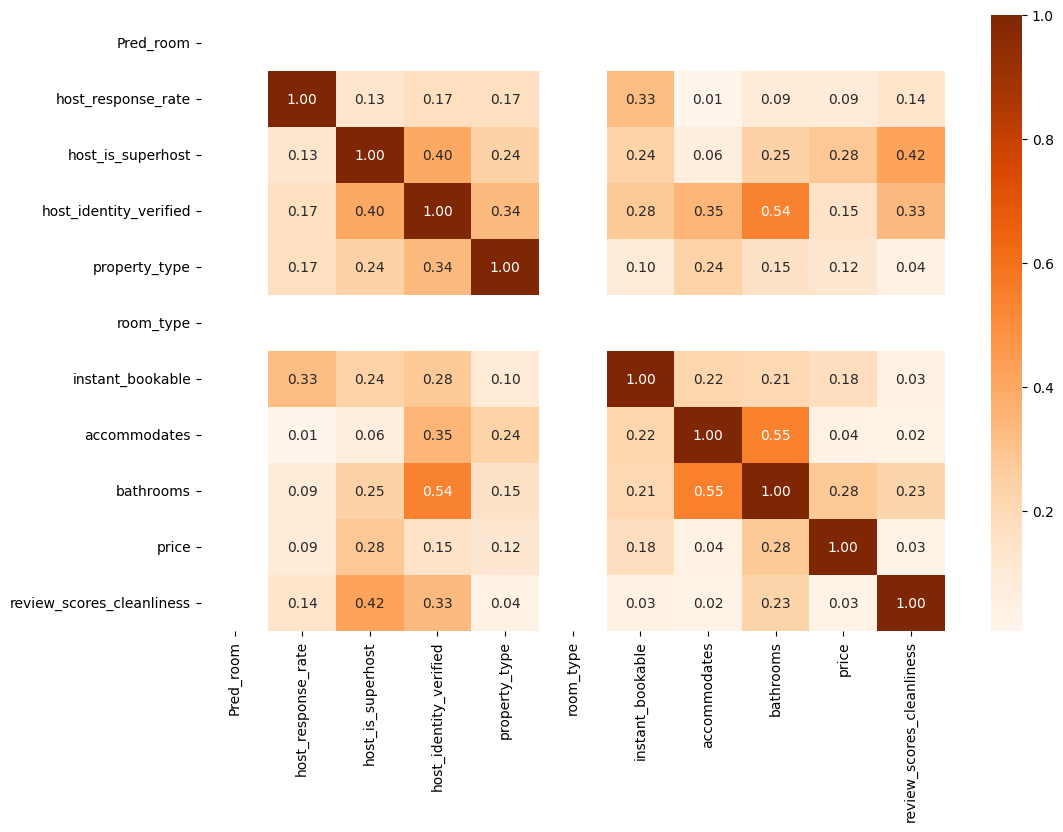

In [94]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f")
Heart_Nap

<Axes: >

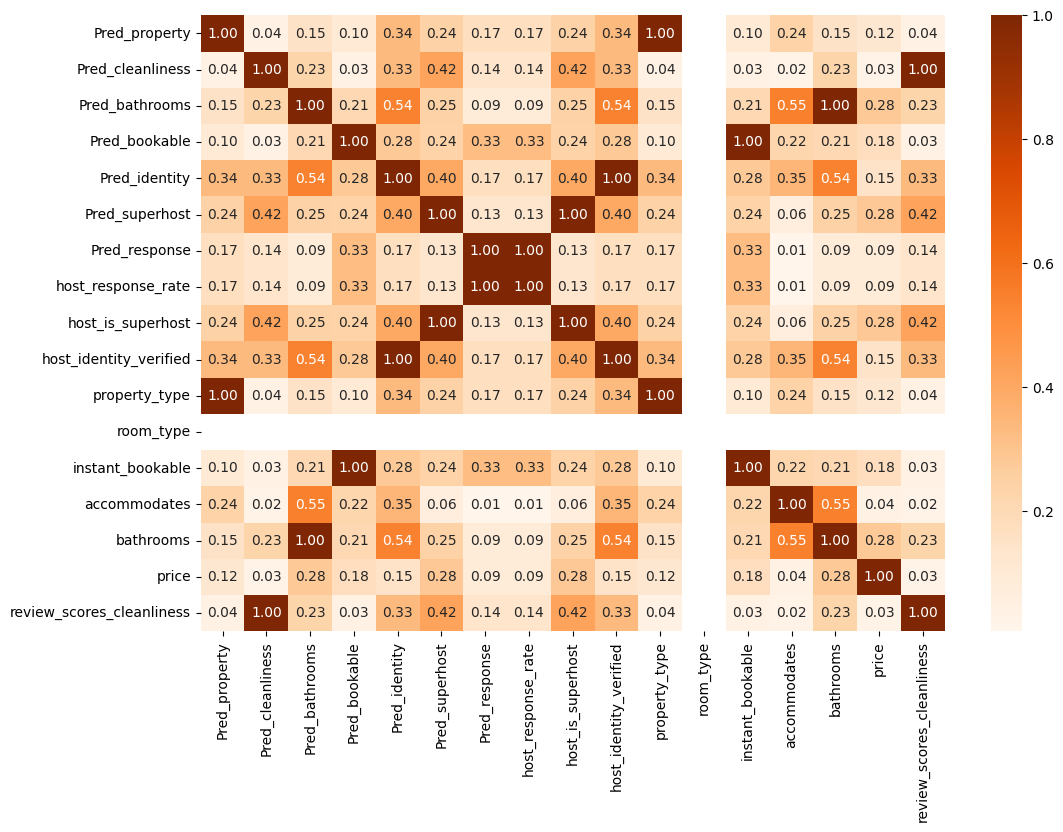

In [96]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1_pred, cmap= 'Oranges', annot=True, fmt=".2f")
Heart_Nap